In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
sns.set_style('darkgrid')

In [49]:
df = pd.read_csv('data/data.csv')
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [51]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [52]:
df.shape

(2017, 16)

In [53]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [54]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


## data analysis

In [55]:
## top 5 most popular aritists
top_5_artists = df.groupby('artist').count().sort_values(by='song_title', ascending=False)
top_5_artists["song_title"].head()

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

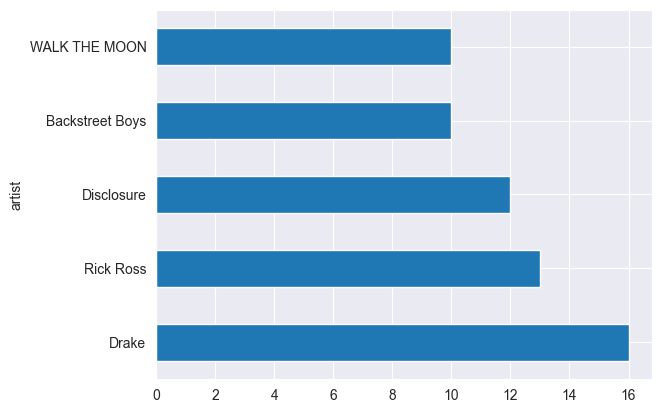

In [56]:
top_5_artists["song_title"].head().plot.barh()
plt.show()

In [57]:
## top_5 loudest songs
loudest_tracks = df[['loudness', 'song_title']].sort_values(by='loudness', ascending=False).head(5)
loudest_tracks

,loudness,song_title
195,-0.307,GodLovesUgly
636,-0.718,The Lion - Original Mix
1443,-0.787,The Wall
2010,-0.935,Hey Baby - Steve Aoki Remix
1299,-0.994,No Absolution


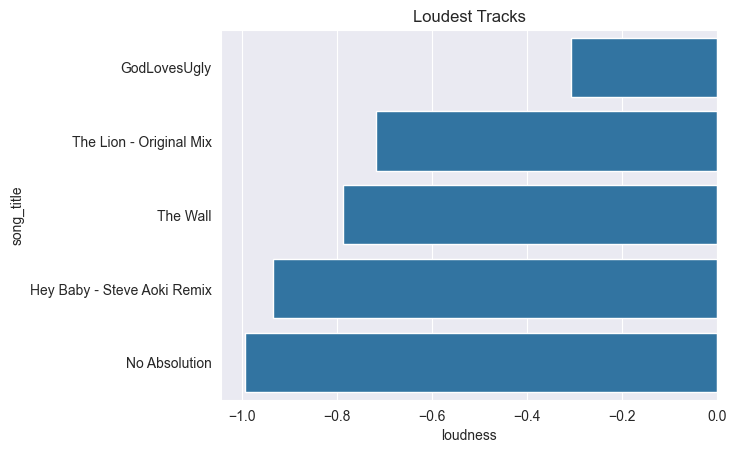

In [58]:
sns.barplot(x='loudness', y='song_title', data=loudest_tracks)
plt.title('Loudest Tracks')
plt.show()

In [59]:
## artist with most danceability song 
most_danceability_song = df[["danceability", "artist", "song_title"]].sort_values(by='danceability', ascending=False).head(5)
most_danceability_song

,danceability,artist,song_title
1433,0.984,Ben Remember,Flashwind - Radio Edit
1901,0.967,Justin Timberlake,SexyBack
604,0.962,Blaqstarr,Check Me Out Like
32,0.959,Young Thug,Best Friend
1957,0.959,Vanilla Ice,Ice Ice Baby


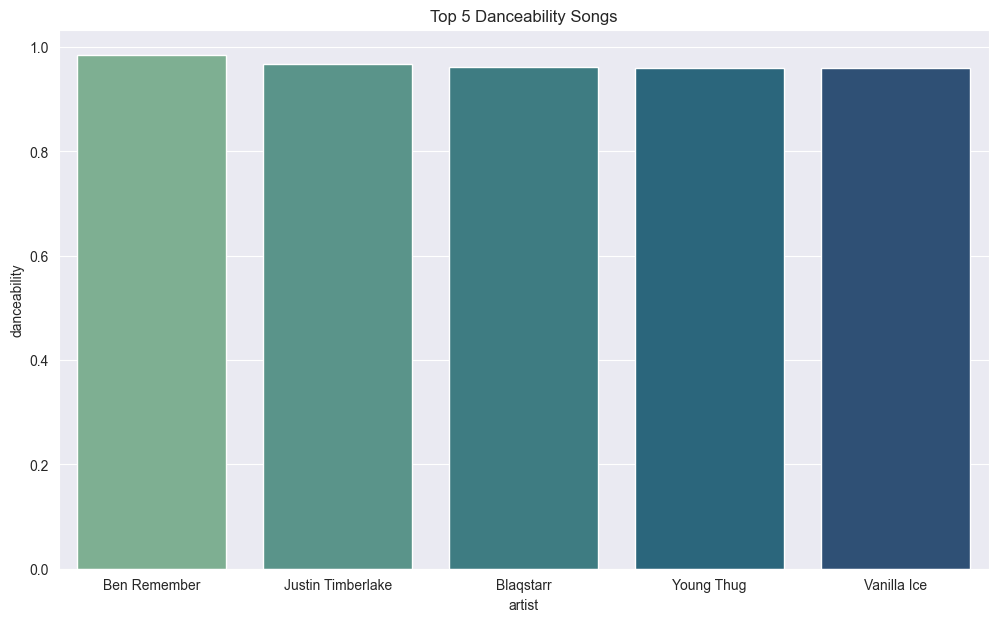

In [60]:
plt.figure(figsize=(12, 7))
sns.barplot(y="danceability", x="artist", data=most_danceability_song, hue="artist", palette="crest")
plt.title("Top 5 Danceability Songs")
plt.show()

In [61]:
## top 10 instrumental tracks 
instrumental_tracks = df[['artist','song_title','instrumentalness']].sort_values(by=['instrumentalness'], ascending=False).head(5)
instrumental_tracks

,artist,song_title,instrumentalness
1313,Signs of the Swarm,Senseless Order,0.976
271,Prince Rama,So Destroyed (channeling Rage Peace),0.968
1575,Ray Bryant,A Hundred Dreams from Now,0.964
1619,John Dahlbäck,Raven,0.958
725,Todd Terje,Strandbar (disko),0.957


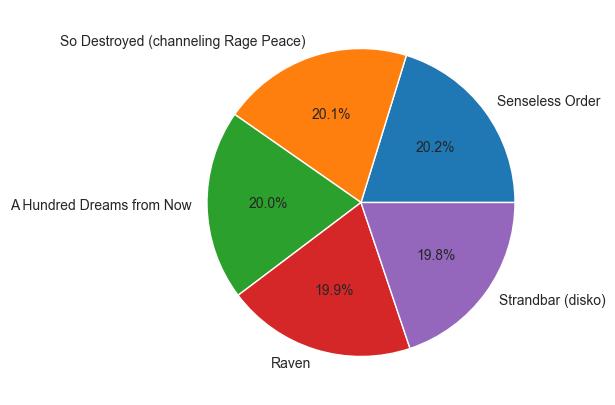

In [62]:
plt.figure(figsize=(10, 5))
plt.pie(data=instrumental_tracks, labels=instrumental_tracks.song_title, autopct='%1.1f%%', x='instrumentalness')
plt.show()

In [63]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [64]:
track_features = ['tempo','loudness','acousticness','danceability','duration_ms', 'energy','instrumentalness','liveness','speechiness','valence']

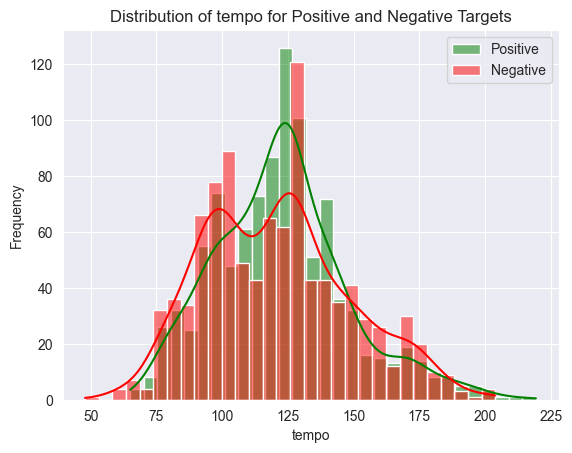

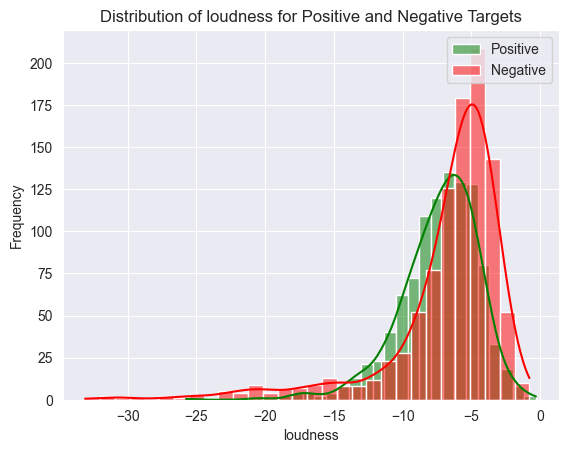

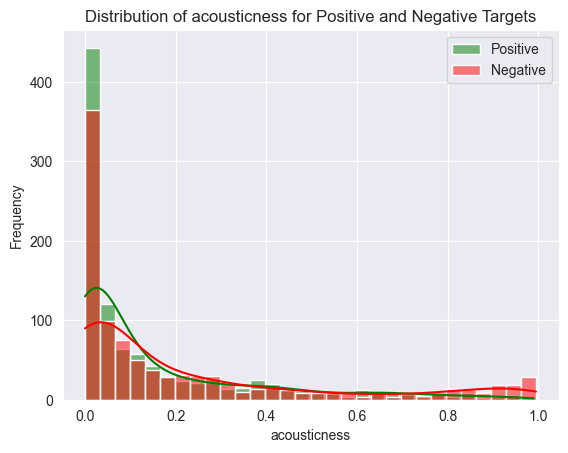

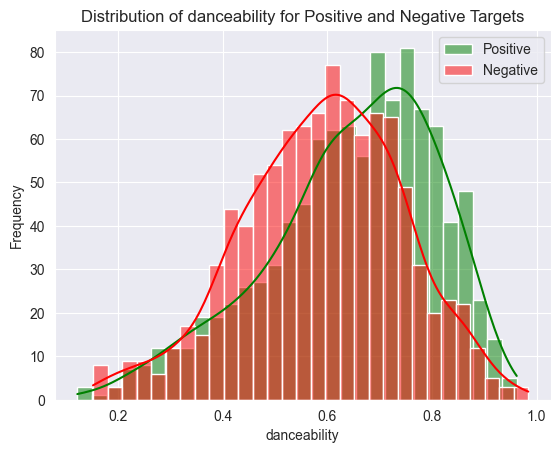

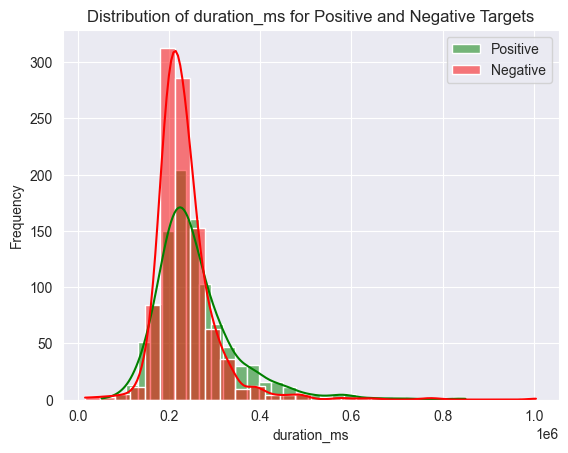

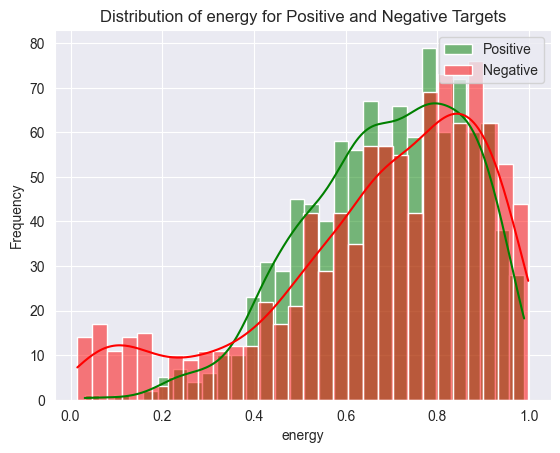

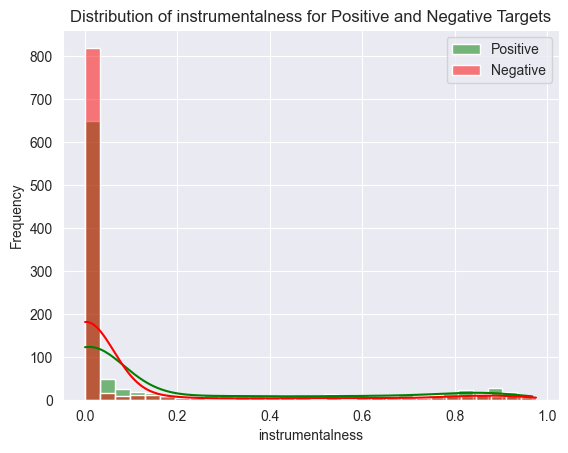

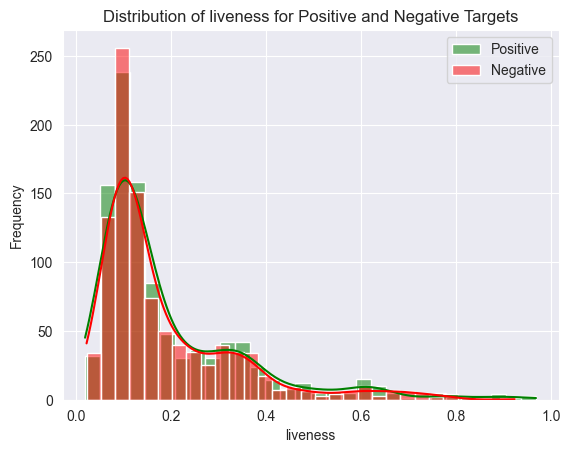

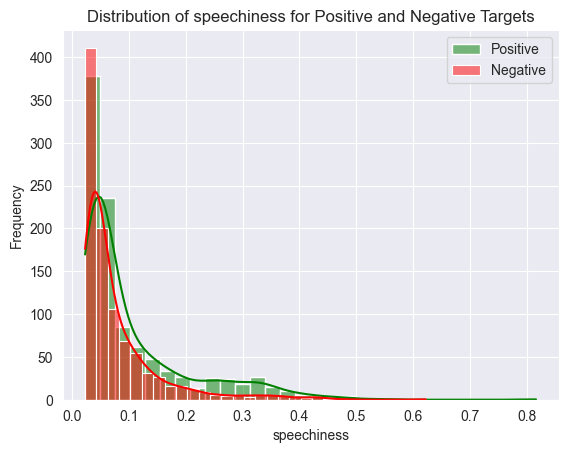

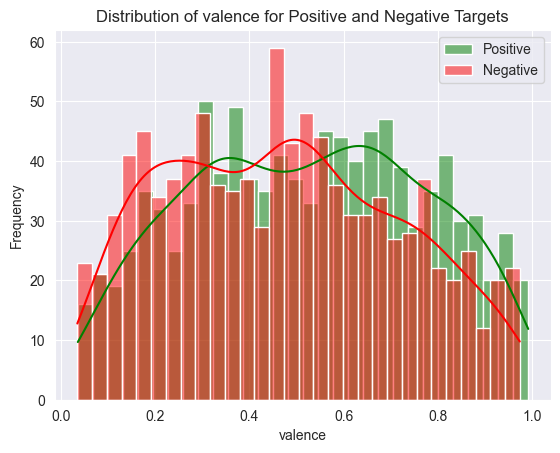

In [69]:
for ftr in track_features:
    positive_target = df[df['target'] == 1][ftr]
    negative_target = df[df['target'] == 0][ftr]

    # Plot histograms for positive and negative targets on the same axis
    sns.histplot(positive_target, color="g", bins=30, kde=True, label="Positive", alpha=0.5)
    sns.histplot(negative_target, color="r", bins=30, kde=True, label="Negative", alpha=0.5)

    plt.legend(loc='upper right')
    plt.title(f"Distribution of {ftr} for Positive and Negative Targets")
    plt.xlabel(ftr)
    plt.ylabel("Frequency")
    plt.show()